# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer
import matplotlib.pyplot as plt
from scipy.stats import norm

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [2]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [3]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

**Answer**: 'np.newaxis' is used to add an extra dimension to the data array. It converts the 1D array into a 2D array to make it a vector. 


Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [4]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [5]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
#path = r"8dm50-machine-learning/practicals/code"
#sys.path.append(path)

In [6]:
# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]


#### Mean Squared error of model

In [7]:
# Calcuate the mean squared error of the model with a function in linear_regression.py
mse_train=mean_squared_error(X_train, y_train, beta)
print('The mean squared error on training data is:', mse_train)

# Calculate the mean square error on the test data
mse_test=mean_squared_error(X_test, y_test, beta)
print('The mean squared error on test data is:', mse_test)

The mean squared error on training data is: 2923.0002005013744
The mean squared error on test data is: 2794.569014500727


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

Since we now have a weighting vector $\boldsymbol{\mathrm{d}}$, 

$\hat{y} = \boldsymbol{\mathrm{X}^{T}}\boldsymbol{\mathrm{d}}\boldsymbol{\hat{\mathrm{w}}}$.

When we want to calculate the residual sum of squares, this gives:

$RSS(\boldsymbol{\mathrm{w}}) = \sum \limits_{i=1}^{N} (y_{i}-\boldsymbol{\mathrm{x}}_{i}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{w}})^{2}$ 

or in matrix notation 
$ RSS(\boldsymbol{\mathrm{w}}) = (\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{w}})^{T}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{w}})$.

To find the minimum we need to differentiate with respect to w, which gives 

$ -2\boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}})$.

To find the minimum, the derivative must be 0, so

$ -2\boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}}) = 0$

$ \boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}}) = 0$

$ \boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}} = 0$

$\boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{y}} = \boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}} $

If $\boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}$ is non-singular there exists a unique solution given by

$\boldsymbol{\mathrm{\hat{w}}} = (\boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}})^{-1} \boldsymbol{\mathrm{X}}^T\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{y}} $

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [9]:
# Define normalisation, then use it to split the array in its defined sets, train, validation and test
# Make the normalized test, validation and test sets
X_train, X_validate, X_test, y_train, y_validate, y_test = generate_sets(breast_cancer)

In [10]:
# Initialize a dictionary to store accuracy scores for each k value
accuracy_scores = defaultdict(list)

# Train and evaluate the k-NN classifier for different values of k
# k values that we want to validate
K_total = 30
k_values=list(range(1,K_total));

# Train and evaluate the k-NN classifier for different values of k
for k in k_values:
    y_pred = predict_classification(X_train, y_train, X_validate, k)
    accuracy= Evaluate(y_validate, y_pred)
    accuracy_scores["k"].append(k)
    accuracy_scores["accuracy"].append(accuracy)
    if k in list(range(1,K_total,5)):
        print("Accuracy calculation for k-value",k,"has been completed")

Accuracy calculation for k-value 1 has been completed
Accuracy calculation for k-value 6 has been completed
Accuracy calculation for k-value 11 has been completed
Accuracy calculation for k-value 16 has been completed
Accuracy calculation for k-value 21 has been completed
Accuracy calculation for k-value 26 has been completed


The most accuracte clasififaction is made with k = 3 with accuracy= 0.9813953488372092 for the validation set


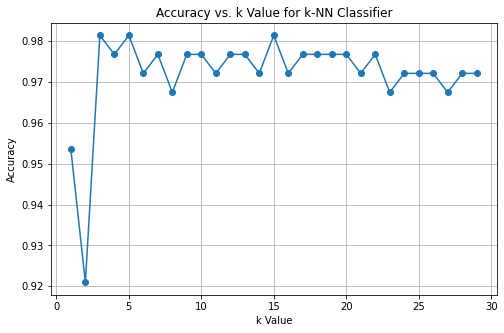

In [11]:
# Evaluate which value for k will generate the most accurate predictions on the validation set.
maximum_accuracy = max(accuracy_scores["accuracy"])
best_k = accuracy_scores["accuracy"].index(maximum_accuracy)+1

print("The most accuracte clasififaction is made with k =",best_k,"with accuracy=",maximum_accuracy,"for the validation set")

#Plot the different accuracies 
plt.figure(figsize=(8, 5))
plt.plot(accuracy_scores["k"], accuracy_scores["accuracy"], marker='o')
plt.title('Accuracy vs. k Value for k-NN Classifier')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Final accuracy for k = 3 is 0.9074074074074074


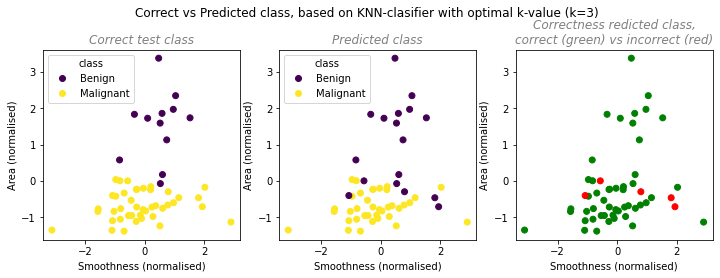

In [12]:
# Finally, we can test the accuracy of of the clasification with the test set.

y_pred = predict_classification(X_train, y_train, X_test, best_k)
final_accuracy= Evaluate(y_test, y_pred)
print("Final accuracy for k =",best_k,"is", final_accuracy)

import matplotlib.pyplot as plt
import numpy as np


# To visualise the predictions a figure with three plots is made;
# plot 1) Visualises the correct classes from the test set
# plot 2) Visualises the predicted classes from the test set
# plot 3) Visualises the difference between plot 1 and 2, red data points are incorrectly predicted classes.


plt.figure(figsize=(12,3.5))
Correct_pred = []
for i in range(y_test.size):
    if y_test[i] == y_pred[i]:
        Correct_pred.append("green")
    else:
        Correct_pred.append("red")

data = {'label_test': y_test,
        'label_pred': y_pred,
        'correct': Correct_pred,
        'x': X_test.transpose()[4],
        'y': X_test.transpose()[3]}
plt.subplot(131)
plt.title("Correct test class", color="grey", style='italic')

scatter = plt.scatter('x', 'y', c='label_test', data=data)
plt.xlabel('Smoothness (normalised)')
plt.ylabel('Area (normalised)')
plt.legend(handles=scatter.legend_elements()[0], 
           title="class",labels=['Benign','Malignant'])

plt.subplot(132)
plt.title("Predicted class", color="grey", style='italic')
scatter2 = plt.scatter('x', 'y', c='label_pred', data=data)
plt.xlabel('Smoothness (normalised)')
plt.ylabel('Area (normalised)')
plt.legend(handles=scatter2.legend_elements()[0], 
           title="class",labels=['Benign','Malignant'])


plt.subplot(133)
plt.title("Correctness redicted class,\ncorrect (green) vs incorrect (red)", color="grey", style='italic')
scatter3 = plt.scatter('x', 'y', c='correct', data=data)
plt.xlabel('Smoothness (normalised)')
plt.ylabel('Area (normalised)')


plt.suptitle("Correct vs Predicted class, based on KNN-clasifier with optimal k-value (k=3)",y=1.05)

plt.show()

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

In [13]:
#Make the normalized test, validation and test sets
X_train_dia, X_validate_dia, X_test_dia, y_train_dia, y_validate_dia, y_test_dia = generate_sets(diabetes)

In [14]:
# Initialize a dictionary to store mse scores for each k value
mse_scores = defaultdict(list)

# Train and evaluate the k-NN regressor for different values of k
# k values that we want to validate
K_total = 30
k_values=list(range(1,K_total));

# Train and evaluate the k-NN regressor for different values of k
for k in k_values:
    y_pred_reg = predict_regression(X_train_dia, y_train_dia, X_validate_dia, k)
    mse = mse_score(y_validate_dia, y_pred_reg)
    mse_scores["k"].append(k)
    mse_scores["mse"].append(mse)

The most accuracte regression is made with k = 10 with mse= 2750.7733628318592 for the validation set


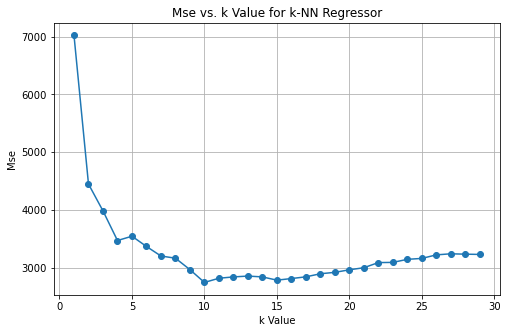

In [15]:
# Evaluate which value for k will generate the most accurate predictions on the validation set.
minimum_mse = min(mse_scores["mse"])
best_k = mse_scores["mse"].index(minimum_mse)+1

print("The most accuracte regression is made with k =",best_k,"with mse=",minimum_mse,"for the validation set")


plt.figure(figsize=(8, 5))
plt.plot(mse_scores["k"], mse_scores["mse"], marker='o')
plt.title('Mse vs. k Value for k-NN Regressor')
plt.xlabel('k Value')
plt.ylabel('Mse')
plt.grid(True)
plt.show()

In [16]:
# Finally, we can test the mse of the regressor with the test set.
y_pred_test=predict_regression(X_train_dia, y_train_dia, X_test_dia, best_k)
final_mse= mse_score(y_test_dia, y_pred_test)
print("Final mse for k =",best_k,"is", final_mse)

Final mse for k = 10 is 2004.2851724137931


### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



In [17]:
X = breast_cancer.data
Y = breast_cancer.target[:, np.newaxis]

cancer_index = np.where(Y == 1)[0]
no_cancer_index = np.where(Y == 0)[0]

cancer = X[cancer_index, :]
no_cancer = X[no_cancer_index, :]

In [18]:
cancer_info = mean_and_std(cancer)
no_cancer_info = mean_and_std(no_cancer)

In [ ]:
k = 0
figure, axis = plt.subplots(5, 6, figsize=(25,20))
for i in range(5):
    for j in range(6):
        x_cancer = np.arange(15*-cancer_info[1][k],15*cancer_info[1][k],0.001)
        x_no_cancer = np.arange(15*-no_cancer_info[1][k],15*no_cancer_info[1][k],0.001)
        axis[i, j].plot(x_no_cancer, norm.pdf(x_no_cancer,no_cancer_info[0][k],no_cancer_info[1][k]))
        axis[i, j].plot(x_cancer, norm.pdf(x_cancer,cancer_info[0][k],cancer_info[1][k]))
        axis[i, j].set_title('Feature '+str(k+1))
        axis[i, j].legend(['0', '1'])
        k = k+1
    
plt.show()

Judging from these plots, feature 28 seems to be able to discriminate best between the two classes. The distribution graphs have the least overlap, meaning that if the values for that feature fall within a certain range, they are more likely to fall into one class.